In [1]:
import numpy as nmp
import matplotlib.pyplot as plt

#### Functions

In [2]:
# Code

# 1. Время распространнения сигнала по кабелю между двумя наиболее удаленными станциями
def taupf(S, V):
    return S / V

# 2. Максимальное время задержки сигналов в ретрансляторах
def tauptf(np, Lp, B):
    return np * Lp / B

# 3. Полное время распространения сигнала
def tauf(taup, taupt):
    return taup + taupt

# 4. Длительность информационной части кадра
def tauif(Li, B):
    return Li / B

# 5. Длительность служебной части кадра
def taucf(Lc, B):
    return Lc / B

# 6. Суммарная средняя длительность кадра
def taucpf(taui, tauc):
    return taui + tauc

# 7. Коэффициент вариации времени передачи кадров сообщений
def vcpf(taui, taucp):
    return taui / taucp

# 8. Суммарное значение интенсивности поступления сообщений
def lamdaf(M, lamdacp):
    return M*lamdacp

# 9. Суммарный коэффициент загрузки
def Rf(lamda, taucp):
    return lamda * taucp

# 10. Коэффициент дальнодействия, с учетом времени задержки в ретрансляторах
def alphaf(tau, taucp):
    return tau / taucp

# 11. Относительное время задержки доставки сообщения
def tntaucpf(R, vcp, alpha):
    return  R * (1 + vcp**2) * (1 + alpha * (1 + 2*nmp.e)) / (2 * (1 - R * (1 + alpha * (1 + 2*nmp.e)))) + 1 + alpha / 2

# 12. Время передачи
def tnf(tntaucp, taucp):
    return tntaucp * taucp

# 13. Пропускная способность канала
def Cf(alpha):
    return 1 / (1 + alpha * (1 + 2*nmp.e))

# 14. Предельно допустимое значение суммарной интенсивности, при котором загрузка достигает величины пропускной способности канала
def lamdamaxf(C, taucp):
    return C / taucp

# 15. Минимальное время задержки доставки (при R = 0)
def tnminf(alpha, taucp):
    return (1 + alpha/2) * taucp

#### Variables

In [3]:
# Variables

# Протяженность сети, км
S = 2

# Скорость модуляции, бит/с
B = 25e6

# Число станций
M = 45

# Скорость распространения сигнала по кабелю, км/с
V = 2e5

# Максимальное число ретрансляторов между двумя станциями
np = 2

# Максимальная задержка одного ретранслятора в битах
Lp = 13

# Средняя длина информационной части кадра, бит
Li = 1400

# Средняя длина служебной части кадра, бит
Lc = 320

# Закон распределения длин информационной части кадра (обычно экспоненциальный)
vi = 1

# Закон распределения длин служебной части кадра (обычно детерминированный)
vc = 0

# Среднее значение интенсивности сообщений, поступающих от каждой станции, с-1
lamdacp = 10

#### Calculations

In [4]:
# 1. Время распространения сигнала по кабелю между двумя наиболее удаленными станциями
# taup = S / V
taup = taupf(S=S, V=V)
print(f'1. Время распространнения сигнала по кабелю между двумя наиболее удаленными станциями taup: {taup:f} с')


# 2. Максимальное время задержки сигналов в ретрансляторах
# taupt = np * Lp / B
taupt = tauptf(np=np, Lp=Lp, B=B)
print(f'2. Максимальное время задержки сигналов в ретрансляторах taupt: {taupt:.8f} с')


# 3. Полное время распространения сигнала
# tau = taup + taupt
tau = tauf(taup=taup, taupt=taupt)
print(f'3. Полное время распространения сигнала tau: {tau:.8f} с')


# 4. Длительность информационной части кадра
# taui = Li / B
taui = tauif(Li=Li, B=B)
print(f'4. Длительность информационной части кадра taui: {taui:f} с')


# 5. Длительность служебной части кадра
# tauc = Lc / B
tauc = taucf(Lc=Lc, B=B)
print(f'5. Длительность служебной части кадра tauc: {tauc:.7f} с')


# 6. Суммарная средняя длительность кадра
# taucp = taui + tauc
taucp = taucpf(taui=taui, tauc=tauc)
print(f'6. Суммарная средняя длительность кадра taucp: {taucp:.7f} с')


# 7. Коэффициент вариации времени передачи кадров сообщений
# vcp = taui / taucp
vcp = vcpf(taui=taui, taucp=taucp)
print(f'7. Коэффициент вариации времени передачи кадров сообщений vcp: {vcp:f}')


# 8. Суммарное значение интенсивности поступления сообщений
# lamda = M*lamdacp
lamda = lamdaf(M=M, lamdacp=lamdacp)
print(f'8. Суммарное значение интенсивности поступления сообщений lamda: {lamda} c-1')


# 9. Суммарный коэффициент загрузки
# R = lamda * taucp
R = Rf(lamda=lamda, taucp=taucp)
print(f'9. Суммарный коэффициент загрузки R: {R:.5f}')

# 10. Коэффициент дальнодействия, с учетом времени задержки в ретрансляторах
# alpha = tau / taucp
alpha = alphaf(tau=tau, taucp=taucp)
print(f'10. Коэффициент дальнодействия, с учетом времени задержки в ретрансляторах alpha: {alpha:.5f}')


# 11. Относительное время задержки доставки сообщения
# tntaucp = R * (1 + vcp**2) * (1 + alpha * (1 + 2*nmp.e)) / (2 * (1 - R * (1 + alpha * (1 + 2*nmp.e)))) + 1 + alpha / 2
tntaucp = tntaucpf(R=R, vcp=vcp, alpha=alpha)
print(f'11. Относительное время задержки доставки сообщения tntaucp: {tntaucp:.5f}')


# 12. Время передачи
# tn = tntaucp * taucp
tn = tnf(tntaucp=tntaucp, taucp=taucp)
print(f'12. Время передачи tn: {tn:.10f}')


# 13. Пропускная способность канала
# C = 1 / (1 + alpha * (1 + 2*nmp.e))
C = Cf(alpha=alpha)
print(f'13. Пропускная способность канала C: {C:.6f}')


# 14. Предельно допустимое значение суммарной интенсивности, при котором загрузка достигает величины пропускной способности канала
# lamdamax = C / taucp
lamdamax = lamdamaxf(C=C, taucp=taucp)
print(f'14. Предельно допустимое значение суммарной интенсивности lamdamax: {lamdamax:.0f}')


# 15. Минимальное время задержки доставки (при R = 0)
# tnmin = (1 + alpha/2) * taucp
tnmin = tnminf(alpha=alpha, taucp=taucp)
print(f'15. Минимальное время задержки доставки tnmin: {tnmin:.11f}')


1. Время распространнения сигнала по кабелю между двумя наиболее удаленными станциями taup: 0.000010 с
2. Максимальное время задержки сигналов в ретрансляторах taupt: 0.00000104 с
3. Полное время распространения сигнала tau: 0.00001104 с
4. Длительность информационной части кадра taui: 0.000056 с
5. Длительность служебной части кадра tauc: 0.0000128 с
6. Суммарная средняя длительность кадра taucp: 0.0000688 с
7. Коэффициент вариации времени передачи кадров сообщений vcp: 0.813953
8. Суммарное значение интенсивности поступления сообщений lamda: 450 c-1
9. Суммарный коэффициент загрузки R: 0.03096
10. Коэффициент дальнодействия, с учетом времени задержки в ретрансляторах alpha: 0.16047
11. Относительное время задержки доставки сообщения tntaucp: 1.13606
12. Время передачи tn: 0.0000781612
13. Пропускная способность канала C: 0.491922
14. Предельно допустимое значение суммарной интенсивности lamdamax: 7150
15. Минимальное время задержки доставки tnmin: 0.00007432000


#### Graphic functions

In [5]:
def graph(x, y, ticks, suptitle, xlabel, ylabel, **kwargs):
    fg, ax = plt.subplots(figsize=(10, 7))
    # ax.hist(rsamples, bins, rwidth=0.8, color='#1f77b4')

    if 'xvline1' in kwargs.keys():
        # ax.vlines(x=kwargs['xvline'],ymin=1, ymax=1)
        if 'xvline1ymax' in kwargs.keys():
            ax.axvline(x=kwargs['xvline1'], ymax=kwargs['xvline1ymax'], color='gray', linestyle='dashed', linewidth=1.5)
        else:
            ax.axvline(x=kwargs['xvline1'], color='gray', linestyle='dashed', linewidth=1.5)

    if 'xvline2' in kwargs.keys():
        # ax.vlines(x=kwargs['xvline'],ymin=1, ymax=1)
        ax.axvline(x=kwargs['xvline2'], color='gray', linestyle='dashed', linewidth=1.5)

    if 'yvline1' in kwargs.keys():
        # ax.vlines(x=kwargs['xvline'],ymin=1, ymax=1)
        if 'yvline1xmax' in kwargs.keys():
            ax.axhline(y=kwargs['yvline1'], xmax = kwargs['yvline1xmax'], color='gray', linestyle='dashed', linewidth=1.5)
        else:
            ax.axhline(y=kwargs['yvline1'], color='gray', linestyle='dashed', linewidth=1.5)

    if 'yvlinesolid' in kwargs.keys():
        ax.axhline(y=kwargs['yvlinesolid'], color='tab:blue', linestyle='solid', linewidth=1.5)

    ax.plot(x, y, color='blue')
    fg.suptitle(suptitle, y = 0)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.plot(1, 0, ">k", transform=ax.transAxes, clip_on=False)
    ax.plot(0, 1, "^k", transform=ax.transAxes, clip_on=False)

    # plt.xlabel(xlabel)
    # plt.ylabel(ylabel)
    plt.xlabel(xlabel, horizontalalignment='right', x=1, fontsize=12)
    plt.ylabel(ylabel, verticalalignment='top', y=1, rotation=0, fontsize=14)
    plt.grid()

    plt.xticks(ticks=ticks, fontsize=9, rotation=20)

    if 'ticksformatter' in kwargs.keys():
        ax.xaxis.set_major_formatter(kwargs['ticksformatter'])

    if 'fillbetweenx' in kwargs.keys() and 'fillbetweeny' in kwargs.keys():
        ax.fill_between(x=kwargs['fillbetweenx'], y1=kwargs['fillbetweeny'], color='lightgray')

    plt.show()
    if 'file' in kwargs.keys():
        fg.savefig(kwargs['file'])



def graphbreak(x1, y1, x2, y2, ticks, suptitle, xlabel, ylabel, **kwargs):
    fg, ax = plt.subplots(figsize=(10, 7))
    # ax.hist(rsamples, bins, rwidth=0.8, color='#1f77b4')

    if 'xvline' in kwargs.keys():
        # ax.vlines(x=kwargs['xvline'],ymin=1, ymax=1)
        ax.axvline(x=kwargs['xvline'], color='gray', linestyle='dashed', linewidth=1.5)

    ax.plot(x1, y1, color='blue')
    ax.plot(x2, y2, color='blue')
    fg.suptitle(suptitle, y = 0)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
    # ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
    ax.plot(1, 0, ">k", transform=ax.transAxes, clip_on=False)
    ax.plot(0, 1, "^k", transform=ax.transAxes, clip_on=False)
    # ax.axis['left'].set_axisline_style("-|>")
    # ax.axis['bottom'].set_axisline_style("-|>")

    # ax.annotate("!!!", xy=(1, 1), xytext=(1.1, 1), arrowprops=dict(arrowstyle="->"))

    # plt.xlabel(xlabel, loc='right', fontsize=14)
    # plt.ylabel(ylabel, loc='center', rotation=0, fontsize=14)
    # plt.ylabel(ylabel, loc='top', rotation=0, fontsize=14)
    plt.xlabel(xlabel, horizontalalignment='right', x=1, fontsize=12)
    plt.ylabel(ylabel, verticalalignment='top', y=1, rotation=0, fontsize=14)
    plt.grid()
    plt.xticks(ticks=ticks, fontsize=9, rotation=20)

    plt.show()

    if 'file' in kwargs.keys():
        fg.savefig(kwargs['file'])



#### Graphics

##### 1. График зависимости нормированного времени доставки сообщений от загрузки сети

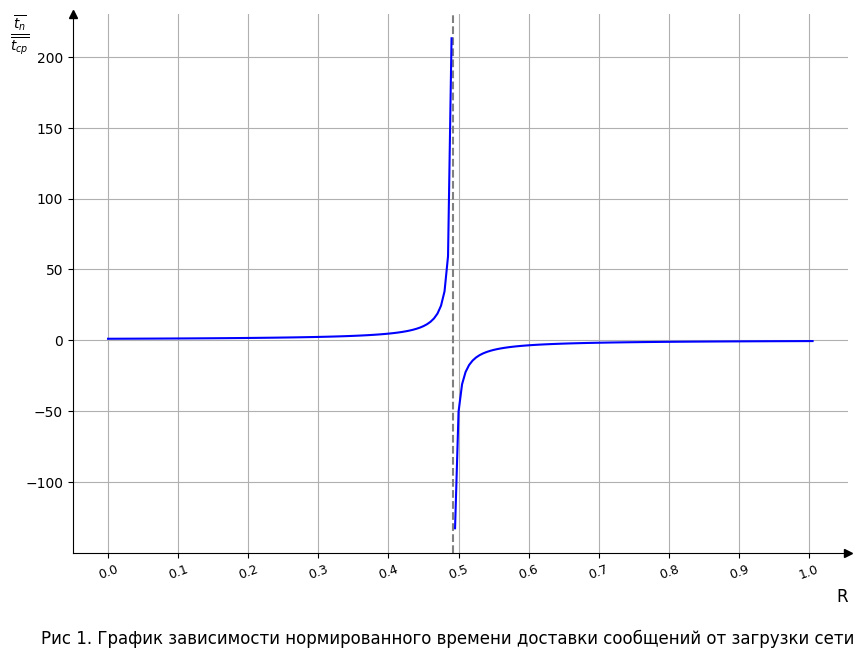

In [6]:
# 1. График зависимости нормированного времени доставки сообщений от загрузки сети

# Точка разрыва: R = 0.492

# Rarray10 = nmp.arange(0, 1.01, 0.01)
# ticks1 = nmp.arange(0, 1.1, 0.1)

Rarray11 = nmp.arange(0, 0.495, 0.005)
Rarray12 = nmp.arange(0.495, 1.01, 0.005)
ticks1 = nmp.arange(0, 1.1, 0.1)
# Rarray10 = nmp.arange(.49, .5, 0.0001, )
# ticks = nmp.arange(.49, .5, 0.001 )

# tntaucparray = tntaucpf(R=Rarray10, vcp=vcp, alpha=alpha)
tntaucparray11 = tntaucpf(R=Rarray11, vcp=vcp, alpha=alpha)
tntaucparray12 = tntaucpf(R=Rarray12, vcp=vcp, alpha=alpha)

# graph(x=Rarray, y=tntaucparray, ticks=ticks, suptitle='Рис 1. График зависимости нормированного времени доставки сообщений от загрузки сети', xlabel='R', ylabel='$t_n/t_{cp}$')
graphbreak(x1=Rarray11, y1=tntaucparray11, x2=Rarray12, y2=tntaucparray12, ticks=ticks1, xvline=0.492, suptitle='Рис 1. График зависимости нормированного времени доставки сообщений от загрузки сети', xlabel='R', ylabel='$\\frac{\overline{t_n}}{\overline{t_{cp}}}$', file='c:/pic1.png')


##### 2. График зависимости нормированного времени доставки сообщений от длины сети

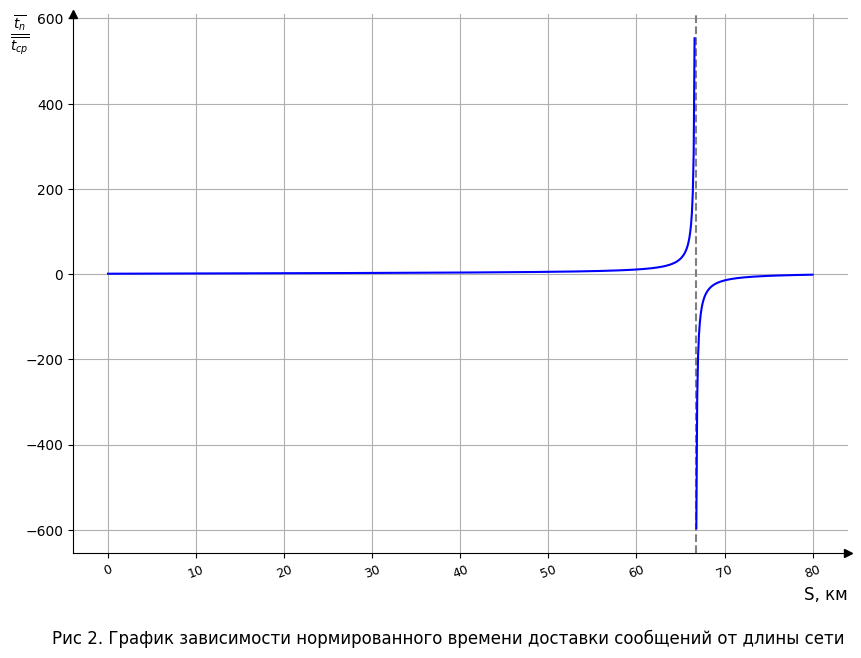

In [7]:
# 2. График зависимости нормированного времени доставки сообщений от длины сети

# Точка разрыва: S = 66.705

def graph2data(S, V, R, taupt, taucp, vcp):
    tauparray = taupf(S=S, V=V)
    tauarray = tauf(taup=tauparray, taupt=taupt)
    alphaarray = alphaf(tau=tauarray, taucp=taucp)
    return tntaucpf(R=R, vcp=vcp, alpha=alphaarray)

# Sarray = nmp.arange(0, 81, 1)
# ticks = nmp.arange(0, 81, 10)
# Sarray = nmp.arange(66.6, 66.8, .001)
# ticks = nmp.arange(66.6, 66.8, 0.01)

# tntaucparray2 = graph2data(S=Sarray, V=V, R=R, taupt=taupt, taucp=taucp, vcp=vcp)


Sarray21 = nmp.arange(0, 66.7, 0.1)
Sarray22 = nmp.arange(66.8, 80.1, 0.1)
ticks2 = nmp.arange(0, 81, 10)
tntaucparray21 = graph2data(S=Sarray21, V=V, R=R, taupt=taupt, taucp=taucp, vcp=vcp)
tntaucparray22 = graph2data(S=Sarray22, V=V, R=R, taupt=taupt, taucp=taucp, vcp=vcp)

# graph(x=Sarray, y=tntaucparray2, ticks=ticks, suptitle='Рис 2. График зависимости нормированного времени доставки сообщений от длины сети', xlabel='R', ylabel='$t_n/t_{cp}$')
graphbreak(x1=Sarray21, y1=tntaucparray21, x2=Sarray22, y2=tntaucparray22, ticks=ticks2, xvline=66.706, suptitle='Рис 2. График зависимости нормированного времени доставки сообщений от длины сети', xlabel='S, км', ylabel='$\\frac{\overline{t_n}}{\overline{t_{cp}}}$', file='c:/pic2.png')


##### 3. График зависимости нормированного времени доставки сообщений от числа станций в сети

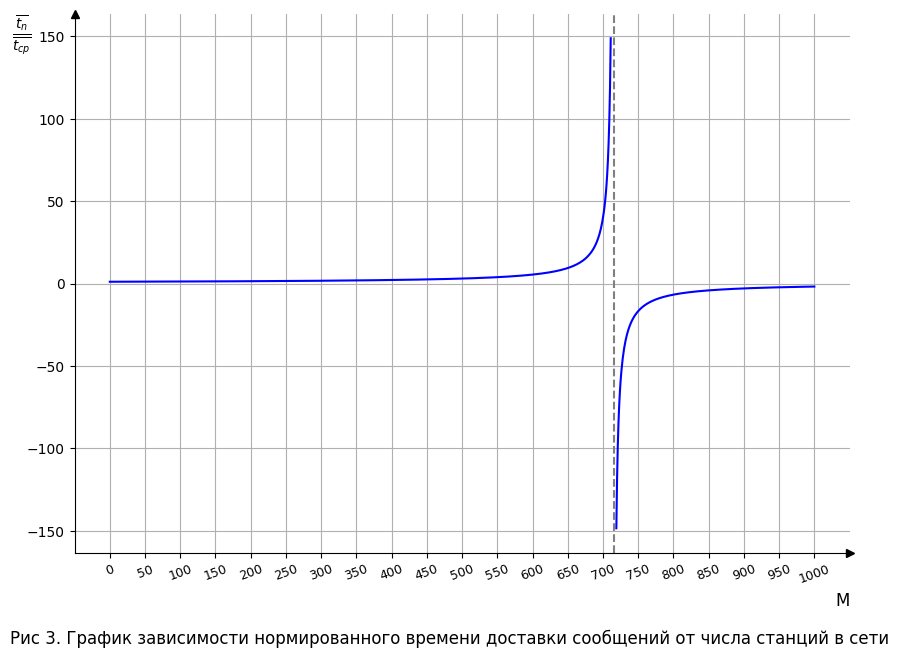

In [8]:
# 3. График зависимости нормированного времени доставки сообщений от числа станций в сети

# Точка разрыва: M = 715

def graph3data(M, lamdacp, taucp, vcp, alpha):
    lamdaarray = lamdaf(M=M, lamdacp=lamdacp)
    Rarray = Rf(lamda=lamdaarray, taucp=taucp)
    return tntaucpf(R=Rarray, vcp=vcp, alpha=alpha)
    

# Marray = nmp.arange(0, 401, 1)
# ticks3 = nmp.arange(0, 401, 10)
# Marray = nmp.arange(710, 720, 1)
# ticks3 = nmp.arange(710, 720, 1)
Marray30 = nmp.arange(0, 712, 1)
ticks3 = nmp.arange(0, 712, 50)

tntaucparray3 = graph3data(M=Marray30, lamdacp=lamdacp, taucp=taucp, vcp=vcp, alpha=alpha)

Marray31 = nmp.arange(0, 712, 1)
Marray32 = nmp.arange(719, 1001, 1)
ticks3 = nmp.arange(0, 1001, 50)

tntaucparray31 = graph3data(M=Marray31, lamdacp=lamdacp, taucp=taucp, vcp=vcp, alpha=alpha)
tntaucparray32 = graph3data(M=Marray32, lamdacp=lamdacp, taucp=taucp, vcp=vcp, alpha=alpha)


# graph(x=Marray, y=tntaucparray3, ticks=ticks3, suptitle='Рис 3. График зависимости нормированного времени доставки сообщений от числа станций в сети', xlabel='M', ylabel='$t_n/t_{cp}$')
graphbreak(x1=Marray31, y1=tntaucparray31, x2=Marray32, y2=tntaucparray32, ticks=ticks3, xvline=715, suptitle='Рис 3. График зависимости нормированного времени доставки сообщений от числа станций в сети', xlabel='M', ylabel='$\\frac{\overline{t_n}}{\overline{t_{cp}}}$', file='c:/pic3.png')


##### 4. График зависимости нормированного времени доставки сообщений от скорости модуляции сигнала

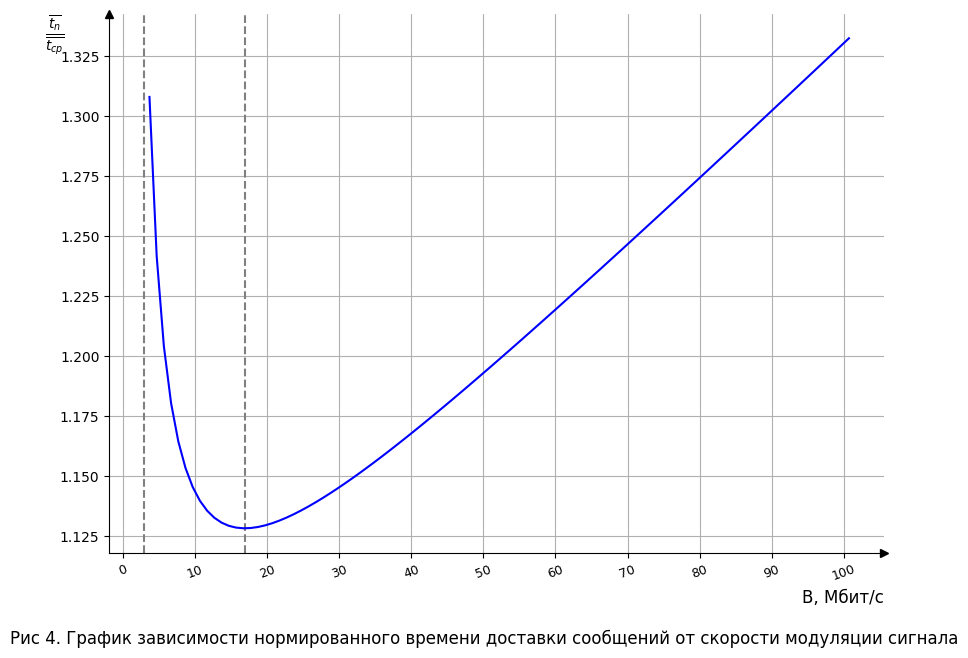

In [9]:
# 4. График зависимости нормированного времени доставки сообщений от скорости модуляции сигнала

from matplotlib.ticker import FormatStrFormatter
import matplotlib as mpl

# Точка разрыва:
# B1 = 874641
# B2 = 16_923_540

def graph4data(B, np, Lp, Li, Lc, taup, lamda):
    tauptarray = tauptf(np=np, Lp=Lp, B=B)
    tauarray = tauf(taupt=tauptarray, taup=taup)
    tauiarray = tauif(Li=Li, B=B)
    taucarray = taucf(Lc=Lc, B=B)
    taucparray = taucpf(taui=tauiarray, tauc=taucarray)
    vcparray = vcpf(taui=tauiarray, taucp=taucparray)
    Rarray = Rf(lamda=lamda, taucp=taucparray)
    alphaarray = alphaf(tau=tauarray, taucp=taucparray)
    return tntaucpf(R=Rarray, vcp=vcparray, alpha=alphaarray)

# Barray = nmp.arange(10e6, 101e6, 1e6)
# ticks4 = nmp.arange(10e6, 101e6, 10e6)
# Barray = nmp.arange(10_000_000, 101_000_000, 1_000_000)
# ticks4 = nmp.arange(10_000_000, 101_000_000, 10_000_000)
# Barray = nmp.arange(3_500_000, 101_000_000, 1_000_000)
# ticks4 = nmp.arange(10_000_000, 101_000_000, 10_000_000)
# Barray = nmp.arange(874_640, 874_650, 1)
# ticks4 = nmp.arange(874_640, 874_650, 1)
# Barray = nmp.arange(16_923_530, 16_923_550, 1)
# ticks4 = nmp.arange(16_923_530, 16_923_550, 1)


Barray4 = nmp.arange(3_700_000, 101_000_000, 1_000_000)
ticks4 = nmp.arange(0, 101_000_000, 10_000_000)

tntaucparray4 = graph4data(B=Barray4, np=np, Lp=Lp, Li=Li, Lc=Lc, taup=taup, lamda=lamda)

# fmt = lambda x, pos: '1+ {:.0f}e-3'.format((x-1)*1e3, pos)
fmt = lambda x, pos: '{:.0f}'.format(x*0.000001, pos)
# axs[1].yaxis.set_major_formatter(mpl.ticker.FuncFormatter(fmt)

# graph(x=Barray, y=tntaucparray4, ticks=ticks4, ticksformatter=FormatStrFormatter('%.i'), xvline1=3000000, xvline2=16_923_540, suptitle='Рис 4. График зависимости нормированного времени доставки сообщений от скорости модуляции сигнала', xlabel='B, бит/с', ylabel='$\\frac{\overline{t_n}}{\overline{t_{cp}}}$', file='c:/pic4.png')
graph(x=Barray4, y=tntaucparray4, ticks=ticks4, ticksformatter=mpl.ticker.FuncFormatter(fmt), xvline1=3000000, xvline2=16_923_540, suptitle='Рис 4. График зависимости нормированного времени доставки сообщений от скорости модуляции сигнала', xlabel='B, Мбит/с', ylabel='$\\frac{\overline{t_n}}{\overline{t_{cp}}}$', file='c:/pic4.png')
# graphbreak(x1=Marray1, y1=tntaucparray31, x2=Marray2, y2=tntaucparray32, ticks=ticks3, suptitle='Рис 3. График зависимости нормированного времени доставки сообщений от числа станций в сети', xlabel='M', ylabel='$\\frac{\overline{t_n}}{\overline{t_{cp}}}$', file='c:/pic4.png')


##### 5. График зависимости пропускной способности сети от средней длительности кадра

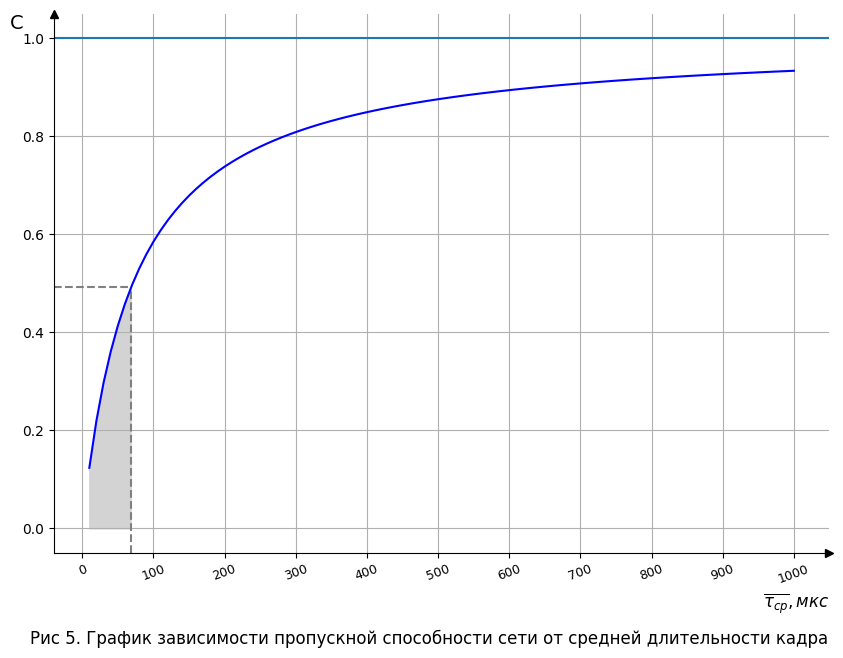

In [10]:
# 5. График зависимости пропускной способности сети от средней длительности кадра

from matplotlib.ticker import FormatStrFormatter
import matplotlib as mpl

# Точка разрыва:
# C = 0.49192
# taucp = 0.0000688 c

def graph5data(taucp, tau):
    alphaarray = alphaf(taucp=taucp, tau=tau)
    return Cf(alpha=alphaarray)

taucparray5 = nmp.arange(0.00001, 0.00101, 0.00001)
ticks5 = nmp.arange(0, 0.0011, 0.0001)

Carray5 = graph5data(taucp=taucparray5, tau=tau)

fillbetweenx = nmp.arange(0.00001, 0.0000688, 0.000001)
fillbetweeny = graph5data(taucp=fillbetweenx, tau=tau)


fmt = lambda x, pos: '{:.0f}'.format(x*1000000, pos)
# fmt = lambda x, pos: '{:.0f}'.format(x*0.000001, pos)
# fmt = lambda x, pos: '1+ {:.0f}e-3'.format((x-1)*1e3, pos)
# axs[1].yaxis.set_major_formatter(mpl.ticker.FuncFormatter(fmt)

# graph(x=taucparray5, y=Carray5, ticks=ticks5, ticksformatter=mpl.ticker.FuncFormatter(fmt), xvline1=taucp, xvline1ymax=C-0.06, yvline1=C, yvline1xmax=taucp*1400, yvlinesolid=1, suptitle='Рис 5. График зависимости пропускной способности сети от средней длительности кадра', xlabel='$\overline{\\tau_{cp}}, мкс$', ylabel='C', file='c:/pic5.png')
graph(x=taucparray5, y=Carray5, ticks=ticks5, ticksformatter=mpl.ticker.FuncFormatter(fmt), xvline1=taucp, xvline1ymax=C, yvline1=C, yvline1xmax=taucp*1400, yvlinesolid=1, fillbetweenx=fillbetweenx, fillbetweeny=fillbetweeny, suptitle='Рис 5. График зависимости пропускной способности сети от средней длительности кадра', xlabel='$\overline{\\tau_{cp}}, мкс$', ylabel='C', file='c:/pic5.png')
# graph(x=Barray, y=tntaucparray4, ticks=ticks4, ticksformatter=mpl.ticker.FuncFormatter(fmt), xvline1=3000000, xvline2=16_923_540, suptitle='Рис 4. График зависимости нормированного времени доставки сообщений от скорости модуляции сигнала', xlabel='B, Мбит/с', ylabel='$\\frac{\overline{t_n}}{\overline{t_{cp}}}$', file='c:/pic4.png')
# graphbreak(x1=Marray1, y1=tntaucparray31, x2=Marray2, y2=tntaucparray32, ticks=ticks3, suptitle='Рис 3. График зависимости нормированного времени доставки сообщений от числа станций в сети', xlabel='M', ylabel='$\\frac{\overline{t_n}}{\overline{t_{cp}}}$', file='c:/pic4.png')


##### 6. График зависимости пропускной способности сети от длины сети

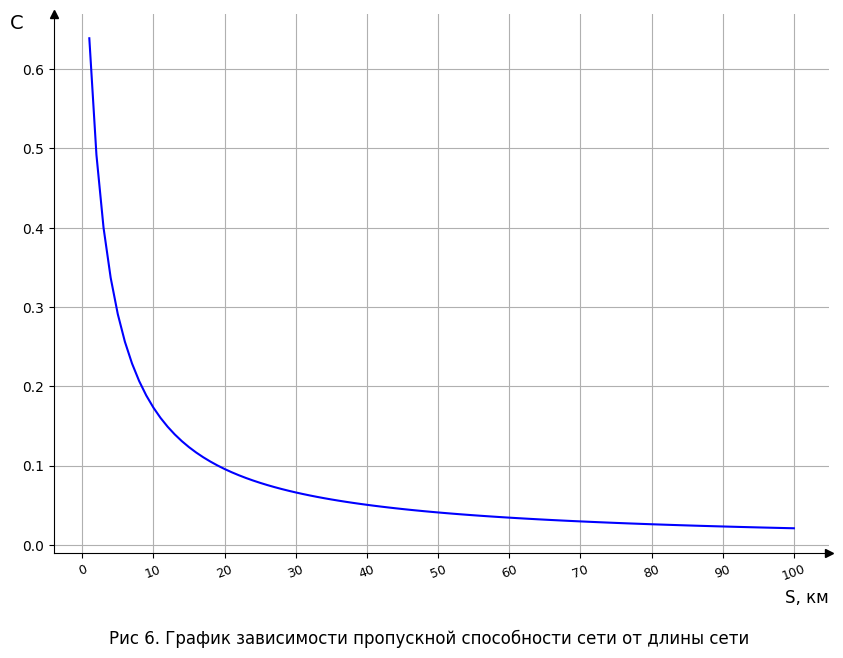

In [11]:
# 6. График зависимости пропускной способности сети от длины сети

from matplotlib.ticker import FormatStrFormatter
import matplotlib as mpl

# Точка разрыва:

def graph6data(S, V, taupt, taucp):
    tauparray = taupf(S=S, V=V)
    tauarray = tauf(taup=tauparray, taupt=taupt)
    alphaarray = alphaf(tau=tauarray, taucp=taucp)
    return Cf(alpha=alphaarray)

Sarray6 = nmp.arange(1, 101, 1)
ticks6 = nmp.arange(0, 101, 10)

Carray6 = graph6data(S=Sarray6, V=V, taupt=taupt, taucp=taucp)

# fmt = lambda x, pos: '{:.0f}'.format(x*1000000, pos)
# fmt = lambda x, pos: '{:.0f}'.format(x*0.000001, pos)
# fmt = lambda x, pos: '1+ {:.0f}e-3'.format((x-1)*1e3, pos)
# axs[1].yaxis.set_major_formatter(mpl.ticker.FuncFormatter(fmt)

graph(x=Sarray6, y=Carray6, ticks=ticks6, suptitle='Рис 6. График зависимости пропускной способности сети от длины сети', xlabel='S, км', ylabel='C', file='c:/pic6.png')
# graph(x=taucparray, y=Carray5, ticks=ticks5, ticksformatter=mpl.ticker.FuncFormatter(fmt), xvline1=taucp, xvline1ymax=C-0.06, yvline1=C, yvline1xmax=taucp*1400, yvlinesolid=1, suptitle='Рис 5. График зависимости пропускной способности сети от средней длительности кадра', xlabel='$\overline{\\tau_{cp}}, мкс$', ylabel='C', file='c:/pic5.png')
# graph(x=Barray, y=tntaucparray4, ticks=ticks4, ticksformatter=mpl.ticker.FuncFormatter(fmt), xvline1=3000000, xvline2=16_923_540, suptitle='Рис 4. График зависимости нормированного времени доставки сообщений от скорости модуляции сигнала', xlabel='B, Мбит/с', ylabel='$\\frac{\overline{t_n}}{\overline{t_{cp}}}$', file='c:/pic4.png')
# graphbreak(x1=Marray1, y1=tntaucparray31, x2=Marray2, y2=tntaucparray32, ticks=ticks3, suptitle='Рис 3. График зависимости нормированного времени доставки сообщений от числа станций в сети', xlabel='M', ylabel='$\\frac{\overline{t_n}}{\overline{t_{cp}}}$', file='c:/pic4.png')


##### 7. График зависимости пропускной способности сети от скорости модуляции сигнала

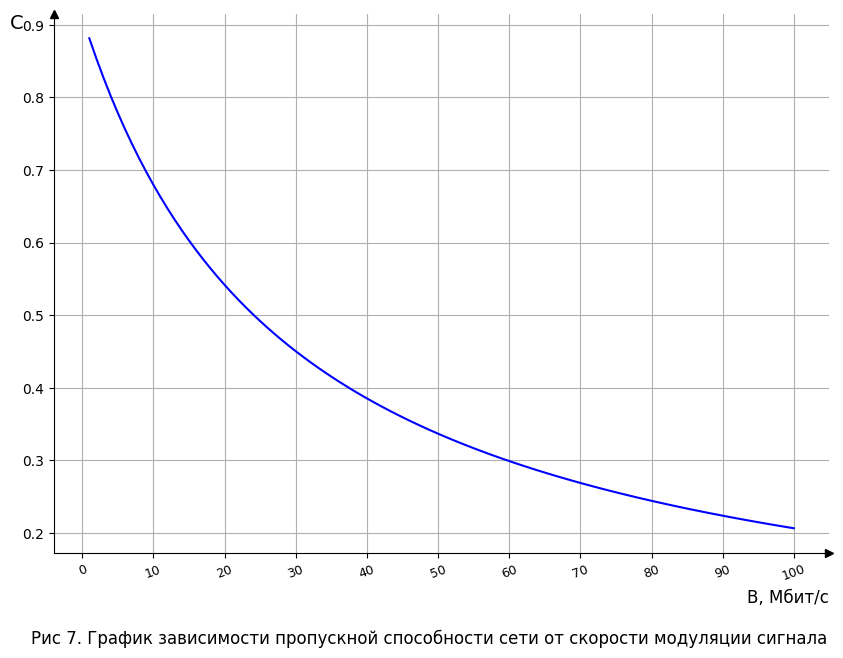

In [12]:
# 6. График зависимости пропускной способности сети от скорости модуляции сигнала

from matplotlib.ticker import FormatStrFormatter
import matplotlib as mpl

# Точка разрыва:

def graph7data(B, np, Lp, Li, Lc, taup):
    tauptattay = tauptf(np=np, Lp=Lp, B=B)
    tauarray = tauf(taupt=tauptattay, taup=taup)
    tauiarray = tauif(Li=Li, B=B)
    taucarray = taucf(Lc=Lc, B=B)
    taucparray = taucpf(taui=tauiarray, tauc=taucarray)
    alphaarray = alphaf(tau=tauarray, taucp=taucparray)
    return Cf(alpha=alphaarray)

Barray7 = nmp.arange(1_000_000, 100_000_001, 1_000_000)
ticks7 = nmp.arange(0, 100_000_001, 10_000_000)


Carray7 = graph7data(B=Barray7, np=np, Lp=Lp, Li=Li, Lc=Lc, taup=taup)

# fmt = lambda x, pos: '{:.0f}'.format(x*1000000, pos)
fmt = lambda x, pos: '{:.0f}'.format(x*0.000001, pos)
# fmt = lambda x, pos: '1+ {:.0f}e-3'.format((x-1)*1e3, pos)
# axs[1].yaxis.set_major_formatter(mpl.ticker.FuncFormatter(fmt)

graph(x=Barray7, y=Carray7, ticks=ticks7, ticksformatter=mpl.ticker.FuncFormatter(fmt), suptitle='Рис 7. График зависимости пропускной способности сети от скорости модуляции сигнала', xlabel='B, Мбит/с', ylabel='C', file='c:/pic7.png')
# graph(x=taucparray, y=Carray5, ticks=ticks5, ticksformatter=mpl.ticker.FuncFormatter(fmt), xvline1=taucp, xvline1ymax=C-0.06, yvline1=C, yvline1xmax=taucp*1400, yvlinesolid=1, suptitle='Рис 5. График зависимости пропускной способности сети от средней длительности кадра', xlabel='$\overline{\\tau_{cp}}, мкс$', ylabel='C', file='c:/pic5.png')
# graph(x=Barray, y=tntaucparray4, ticks=ticks4, ticksformatter=mpl.ticker.FuncFormatter(fmt), xvline1=3000000, xvline2=16_923_540, suptitle='Рис 4. График зависимости нормированного времени доставки сообщений от скорости модуляции сигнала', xlabel='B, Мбит/с', ylabel='$\\frac{\overline{t_n}}{\overline{t_{cp}}}$', file='c:/pic4.png')
# graphbreak(x1=Marray1, y1=tntaucparray31, x2=Marray2, y2=tntaucparray32, ticks=ticks3, suptitle='Рис 3. График зависимости нормированного времени доставки сообщений от числа станций в сети', xlabel='M', ylabel='$\\frac{\overline{t_n}}{\overline{t_{cp}}}$', file='c:/pic4.png')
